In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [44]:
df = pd.read_csv("bm.csv")
df.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,previous
0,56,housemaid,married,basic.4y,no,no,may,mon,261,0
1,57,services,married,high.school,no,no,may,mon,149,0
2,37,services,married,high.school,yes,no,may,mon,226,0
3,40,admin.,married,basic.6y,no,no,may,mon,151,0
4,56,services,married,high.school,no,yes,may,mon,307,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   month        41188 non-null  object
 7   day_of_week  41188 non-null  object
 8   duration     41188 non-null  int64 
 9   previous     41188 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.1+ MB


In [46]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
month          0
day_of_week    0
duration       0
previous       0
dtype: int64

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age,duration,previous
count,41188.00,41188.00,41188.00
mean,40.02,258.29,0.17
std,10.43,259.28,0.49
min,0.00,0.00,0.00
25%,32.00,102.00,0.00
50%,38.00,180.00,0.00
75%,47.00,319.00,0.00
max,98.00,4918.00,7.00


In [48]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'previous'],
      dtype='object')

In [50]:
# How many missing zeros are mising in each feature
feature_columns = ['age','duration']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

age ==> Missing zeros : 5
duration ==> Missing zeros : 4


In [51]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [52]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

age ==> Missing zeros : 0
duration ==> Missing zeros : 0


In [53]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.previous

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24796   109     2     0     0     0     0     0]
 [ 1829  1339     4     2     0     0     0     0]
 [  267    14   249     1     0     0     0     0]
 [   73     5     2    76     1     0     0     0]
 [   23     1     0     0    22     0     0     0]
 [    5     1     0     0     0     6     0     0]
 [    1     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     0     1]]
ACCURACY SCORE:
0.9188
CLASSIFICATION REPORT:
                 0       1      2      3     4     5    6    7  accuracy  \
precision     0.92    0.91   0.97   0.96  0.96  1.00 1.00 1.00      0.92   
recall        1.00    0.42   0.47   0.48  0.48  0.50 0.67 1.00      0.92   
f1-score      0.96    0.58   0.63   0.64  0.64  0.67 0.80 1.00      0.92   
support   24907.00 3174.00 531.00 157.00 46.00 12.00 3.00 1.00      0.92   

           macro avg  weighted avg  
precision       0.96          0.92  
recall          0.63          0.92  
f1-score        0

C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [56]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24790   114     3     0     0     0     0     0]
 [ 1824  1344     4     2     0     0     0     0]
 [  264    16   250     1     0     0     0     0]
 [   74     4     2    77     0     0     0     0]
 [   23     1     0     1    21     0     0     0]
 [    5     1     0     0     0     6     0     0]
 [    1     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     0     1]]
ACCURACY SCORE:
0.9188
CLASSIFICATION REPORT:
                 0       1      2      3     4     5    6    7  accuracy  \
precision     0.92    0.91   0.97   0.95  1.00  1.00 1.00 1.00      0.92   
recall        1.00    0.42   0.47   0.49  0.46  0.50 0.67 1.00      0.92   
f1-score      0.96    0.58   0.63   0.65  0.63  0.67 0.80 1.00      0.92   
support   24907.00 3174.00 531.00 157.00 46.00 12.00 3.00 1.00      0.92   

           macro avg  weighted avg  
precision       0.97          0.92  
recall          0.63          0.92  
f1-score        0

In [59]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [60]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24907     0     0     0     0     0     0     0]
 [ 3174     0     0     0     0     0     0     0]
 [  531     0     0     0     0     0     0     0]
 [  157     0     0     0     0     0     0     0]
 [   46     0     0     0     0     0     0     0]
 [   12     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                 0       1      2      3     4     5    6    7  accuracy  \
precision     0.86    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
recall        1.00    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
f1-score      0.93    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
support   24907.00 3174.00 531.00 157.00 46.00 12.00 3.00 1.00      0.86   

           macro avg  weighted avg  
precision       0.11          0.75  
recall          0.12          0.86  
f1-score        0

C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [61]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [62]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24881     3     1     9     3    10     0     0]
 [ 3144    25     1     4     0     0     0     0]
 [  503     2    20     6     0     0     0     0]
 [  146     0     0    11     0     0     0     0]
 [   40     0     0     0     6     0     0     0]
 [    8     0     0     0     0     4     0     0]
 [    1     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     0     1]]
ACCURACY SCORE:
0.8654
CLASSIFICATION REPORT:
                 0       1      2      3     4     5    6    7  accuracy  \
precision     0.87    0.83   0.91   0.37  0.67  0.29 1.00 1.00      0.87   
recall        1.00    0.01   0.04   0.07  0.13  0.33 0.67 1.00      0.87   
f1-score      0.93    0.02   0.07   0.12  0.22  0.31 0.80 1.00      0.87   
support   24907.00 3174.00 531.00 157.00 46.00 12.00 3.00 1.00      0.87   

           macro avg  weighted avg  
precision       0.74          0.86  
recall          0.41          0.87  
f1-score        0

In [63]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[24907     0     0     0     0     0     0     0]
 [ 3174     0     0     0     0     0     0     0]
 [  531     0     0     0     0     0     0     0]
 [  157     0     0     0     0     0     0     0]
 [   46     0     0     0     0     0     0     0]
 [   12     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                 0       1      2      3     4     5    6    7  accuracy  \
precision     0.86    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
recall        1.00    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
f1-score      0.93    0.00   0.00   0.00  0.00  0.00 0.00 0.00      0.86   
support   24907.00 3174.00 531.00 157.00 46.00 12.00 3.00 1.00      0.86   

           macro avg  weighted avg  
precision       0.11          0.75  
recall          0.12          0.86  
f1-score        0

C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhiruchi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [65]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<AxesSubplot:>

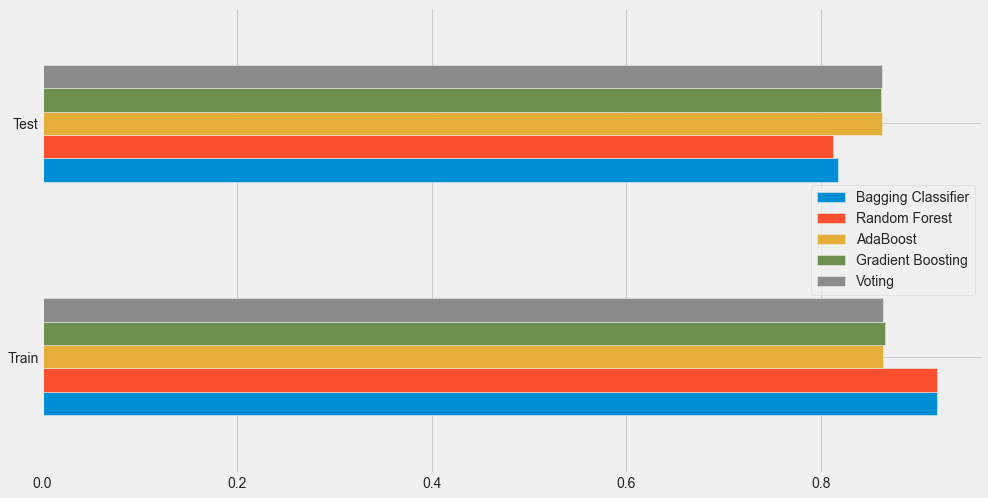

In [66]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [ ]:
#https://www.kaggle.com/code/faressayah/ensemble-ml-algorithms-bagging-boosting-voting/notebook